In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from numpy import exp
from numpy import log
from numpy.linalg import inv

# load spam data
spam_data = scipy.io.loadmat('../data/spamData.mat')

x_train = spam_data['Xtrain']
x_test = spam_data['Xtest']
y_test = spam_data['ytest']
y_train = spam_data['ytrain']

# log-transform features
def log_transform(mail_array):
    log_mail_array = log(mail_array + 0.1)
    return log_mail_array

# insert bias term
bias_train = np.ones((len(x_train), 1))
bias_test = np.ones((len(x_test), 1))

x_train_logtrans = log_transform(x_train)
x_test_logtrans = log_transform(x_test)
x_train_log = np.hstack((bias_train, x_train_logtrans))
x_test_log = np.hstack((bias_test, x_test_logtrans))

# define sigmoid function
def sigmoid(x):
    sigm = 1 / (1 + exp(-x))
    return sigm

#define lambda_range
lambda_1 = np.arange(1, 10, 1)
lambda_2 = np.arange(10, 105, 5)
lambda_range = np.hstack((lambda_1, lambda_2))

In [2]:
def train_weights(lambda_value, train_features, train_labels):
    step = 0
    max_step = 50
    
    # initialise weights
    weight_with_bias = np.zeros((1, len(x_train[0]) + 1))
    
    # start Newtons Method
    while step < max_step:
        # get mu
        mu = sigmoid(np.dot(x_train_log,weight_with_bias.T))

        # get g_reg
        g = np.dot(train_features.T, (mu - train_labels))
        a = np.zeros((1, 1))
        b = np.ones((1, 57))
        c = np.hstack((a, b))
        g_reg = g + np.dot(np.diag(c[0]) * lambda_value, weight_with_bias.T)
        # don't regularize the bias term
        
        # get S and Hessian
        s_list = []
        for i in mu:
            a = i * (1 - i)
            s_list.append(float(a))
        s = np.diag(s_list)

        h = np.dot(np.dot(train_features.T, s), train_features)
        m2 = np.eye(58)
        m2[0][0] = 0
        h_reg = h + lambda_value * m2
        # don't regularize the bias term
        
        # update weight_with_bias
        HH = np.mat(h_reg)
        try:
            convergence_term = inv(HH) * g_reg
        except np.linalg.linalg.LinAlgError:
            convergence_term = np.linalg.pinv(HH) * g_reg

        weight_with_bias = weight_with_bias - convergence_term.T

        step += 1

    return weight_with_bias


def cal_error_rate(mail_test, mail_label, w):
    log_odds = np.dot(mail_test, w.T)
    y_pred = 1 * (log_odds > 0)
    true_num = np.sum(1 * (y_pred == mail_label))
    error_num = len(mail_label) - true_num
    error_rate = error_num / len(mail_label)
    return error_rate

In [3]:
for lambda_value in [1, 10, 100]:
    weights = train_weights(lambda_value, x_train_log, y_train)
    train_error_rate = cal_error_rate(x_train_log, y_train, weights)
    test_error_rate = cal_error_rate(x_test_log, y_test, weights)
    print("Training error rate when λ=%s is:" % lambda_value, train_error_rate)
    print("Test error rate when λ=%s is:" % lambda_value, test_error_rate)
    print()

Training error rate when λ=1 is: 0.053507340946166396
Test error rate when λ=1 is: 0.060546875

Training error rate when λ=10 is: 0.053833605220228384
Test error rate when λ=10 is: 0.059895833333333336

Training error rate when λ=100 is: 0.06394779771615008
Test error rate when λ=100 is: 0.06640625



In [4]:
train_error_rate = []
test_error_rate= []

for lambda_value in lambda_range:
    weights = train_weights(lambda_value, x_train_log, y_train)
    train_error = cal_error_rate(x_train_log, y_train, weights)
    test_error = cal_error_rate(x_test_log, y_test, weights)
    
    train_error_rate.append(train_error)
    test_error_rate.append(test_error)

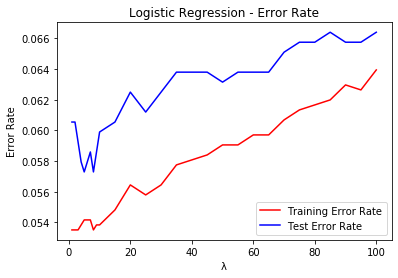

In [5]:
plt.figure(1)
plt.plot(lambda_range, train_error_rate, color='r', label='Training Error Rate')
plt.plot(lambda_range, test_error_rate, color='b', label='Test Error Rate')
plt.title('Logistic Regression - Error Rate')
plt.xlabel('λ')
plt.ylabel('Error Rate')
plt.legend(loc=4)
plt.show()